[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Projects/Classical_Frameworks/BinaryClassification_Tensorflow.ipynb)

In [47]:
!pip install openpyxl -q

In [48]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.optimizers import Adam

In [49]:
df = pd.read_excel("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/Sentiment_Analysis/BBDD.xlsx")

In [50]:
df


,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [51]:
df = df[['review_es','sentimiento']]
df.columns = [ 'review_text','Comentario'] #change to get the same columns as in the tuto, as we don"t have access to his very dataframe

In [52]:
df


,review_text,Comentario
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo


In [53]:
target_map = {'positivo' : 1, 'negativo' : 0}
df['objetivo'] = df['Comentario'].map(target_map)

<ipython-input-53-4dbb189e198e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['objetivo'] = df['Comentario'].map(target_map)


In [54]:
df


,review_text,Comentario,objetivo
0,Uno de los otros críticos ha mencionado que de...,positivo,1
1,Una pequeña pequeña producción.La técnica de f...,positivo,1
2,Pensé que esta era una manera maravillosa de p...,positivo,1
3,"Básicamente, hay una familia donde un niño peq...",negativo,0
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,1
...,...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo,1
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,0
49997,Soy católica enseñada en escuelas primarias pa...,negativo,0
49998,Voy a tener que estar en desacuerdo con el com...,negativo,0


<Axes: >

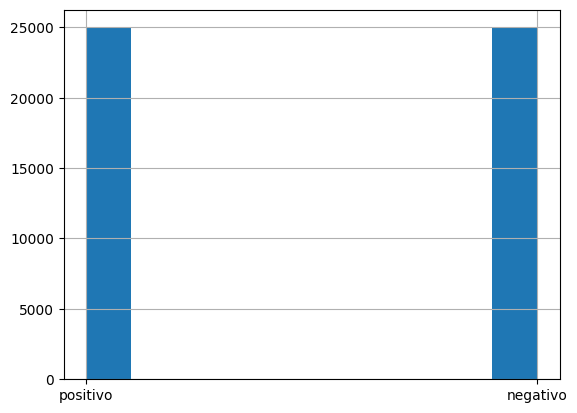

In [55]:
df['Comentario'].hist()

In [56]:
df_train, df_test = train_test_split(df, random_state = 123)

In [57]:
df_train

,review_text,Comentario,objetivo
6105,Como historiador aficionado de la Alemania de ...,positivo,1
9940,No todas las líneas en una comedia son diverti...,positivo,1
45421,Going down as the most expensive film in Finni...,negativo,0
42236,Película sin sentido sobre hacer una película....,negativo,0
15382,"Por lo general, realmente no me gusta tanto Em...",positivo,1
...,...,...,...
7763,¡Esta película fue tan buena!¡Fue hilarante!Ha...,positivo,1
15377,Esta pequeña película ingeniosa demuestra las ...,positivo,1
17730,No habrá un momento en esta película donde no ...,positivo,1
28030,Para los fanáticos del troma o el género Cyber...,positivo,1


In [60]:
# lets vectorize our text
vectorizer = TfidfVectorizer(max_features = 2000)
X_train = vectorizer.fit_transform(df_train['review_text'])
X_test = vectorizer.transform(df_test['review_text'])

In [62]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3468278 stored elements in Compressed Sparse Row format>

In [63]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [41]:
X_test

<bound method _cs_matrix.toarray of <12500x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1346795 stored elements in Compressed Sparse Row format>>

In [64]:
Y_train = df_train['objetivo']
Y_test = df_test['objetivo']

In [43]:
Y_train

,objetivo
6105,1
9940,1
45421,0
42236,0
15382,1
...,...
7763,1
15377,1
17730,1
28030,1


In [65]:
X_train.shape #37500 docs, 2000 words (max_features)

(37500, 2000)

In [67]:
# get the vocabn size
D = X_train.shape[1]
D

2000

In [68]:
i = Input(shape=(D,)) #couche d'entrée . chaque exemple d'entrée est un vecteur de taille D
x = Dense(1)(i) #une couche entièrement connectée (fully connected) de neurones, ici 1 seul neurone
# on applique la couche dense à l'entrée i

model = Model(i,x)


In [69]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(loss= BinaryFocalCrossentropy(from_logits = True),
              optimizer=Adam(),
              metrics=['accuracy']
              )

In [72]:
r = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test), #perfs avec ou sans
    epochs=100,
    batch_size=128
)


#Aspect	:                                  Avec validation_data	                      Sans validation_data
#Suivi des perfs:	                         Pendant l'entraînement    	                Limité à l'entraînement
#Détection d'overfitting	:                    Oui	                                          Non
#Arrêt anticipé (early stopping)	:          Possible	                                 Pas utile sans validation
#Utilisation dans la validation croisée	:  Pas toujours nécessaire	                   Souvent utilisé dans ce cas

Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8416 - loss: 0.0710 - val_accuracy: 0.8263 - val_loss: 0.0882
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.0731 - val_accuracy: 0.8273 - val_loss: 0.0883
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8427 - loss: 0.0725 - val_accuracy: 0.8253 - val_loss: 0.0882
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8404 - loss: 0.0728 - val_accuracy: 0.8256 - val_loss: 0.0883
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.0726 - val_accuracy: 0.8258 - val_loss: 0.0883
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8415 - loss: 0.0714 - val_accuracy: 0.8277 - val_loss: 0.0884
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8437 - loss: 0.0717 - val_accuracy: 0.8282 - val_loss: 0.0884
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8428 - loss: 0.0717 - val_accu

In [74]:
P_train = ((model.predict(X_train) > 0 ) * 1.0).flatten() # model.predict Renvoie un tableau de sorties de la couche finale.
#Ici le tableau de sortie est une couche dense avec activation sigmoide, donc sortie entre 0 et 1
P_test = ((model.predict(X_test) > 0 ) * 1.0).flatten() #question, pourquoi 0 et pas 0.5?

#Supposons les sorties de model.predict(X_train)
#[[0.8],
# [0.4],
# [0.6],
# [0.2]]

#Comparaison avec 0 :[[0.8]>0,[0.4]>0,[0.6]>0,[0.2]>0]  ⟹  [[True],[True],[True],[True]]
#Conversion booléenne en numérique (∗1.0:[[1.0],[1.0],[1.0],[1.0]]
#Aplatissement .flatten()) :[1.0,1.0,1.0,1.0]


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [79]:
cm = confusion_matrix(Y_train, P_train, normalize ="true")
cm
# Par défaut, confusion_matrix classe les résultats dans l'ordre croissant des
# classes présentes dans y_true (0, puis 1 pour une classification binaire). %%

array([[0.87843597, 0.12156403],
       [0.1117578 , 0.8882422 ]])

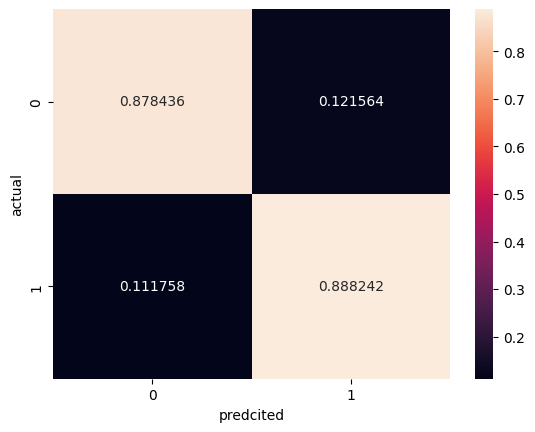

In [80]:
def plot_cm(cm, classes):
  dfcm = pd.DataFrame(cm, index = classes, columns = classes)
  ax = sn.heatmap(cm, annot = True, fmt='g')
  ax.set_xlabel('predcited')
  ax.set_ylabel('actual')
plot_cm(cm, ['negativo','positivo'])

In [82]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)

print('Train AUC :  ', roc_auc_score(Y_train, Pr_train))

print('Test AUC :' ,  roc_auc_score(Y_test, Pr_test))

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train AUC :   0.9551278528906831
Test AUC : 0.9323580994897959


In [83]:
print('Train F1', f1_score(Y_train, P_train))
print('Test F1', f1_score(Y_test, P_test))

Train F1 0.8837827068667817
Test F1 0.8598233995584988


NameError: name 'test_auc' is not defined

<Figure size 640x480 with 0 Axes>